<a href="https://colab.research.google.com/github/senthilanan2016/CodSoft/blob/main/Task_2_Movie_Rating_Prediction_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Task-2 - Movie Raing Prediction with Python**

## **Introduction:**

### In this project, we aim to predict movie ratings based on various features, such as release year, duration, votes etc.. Accurate movie rating predictions can provide valuable insights for filmmakers, studios, and movie enthusiasts

## **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Collection and Pre-Processing**

In [ ]:
# Load the dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Task2/IMDb Movies India.csv", encoding='ISO-8859-1')

In [ ]:
# Display first ten rows of the dataset
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
# Getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# Number of rows and columns in the dataset
print("Number of Rows =", df.shape[0])
print("Number of Columns =", df.shape[1])

Number of Rows = 15509
Number of Columns = 10


In [ ]:
# Checking for null values in the dataset
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
# Dropping the null values
df.dropna(inplace=True)

In [ ]:
df.isnull().values.sum()

0

In [ ]:
# Checking for duplicated values
print("Are there any duplicated Values?", df.duplicated().any())

Are there any duplicated Values? False


In [ ]:
df.shape

(5659, 10)

In [ ]:
# Statistical Summary of the dataset
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


### **Exploratory Data Analysis (EDA)**

In [ ]:
# Year Data Transformation
df['Year'] = df['Year'].str.replace('(', '', regex=False).str.replace(')','', regex=False).astype(int)
df['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [ ]:
# Duration Data Transformation
df['Duration'] = df['Duration'].str.replace('min', '').astype(int)
df['Duration'].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [ ]:
# Votes Data Transformation
df['Votes']=df.Votes.str.replace(',','').astype(int)
df['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

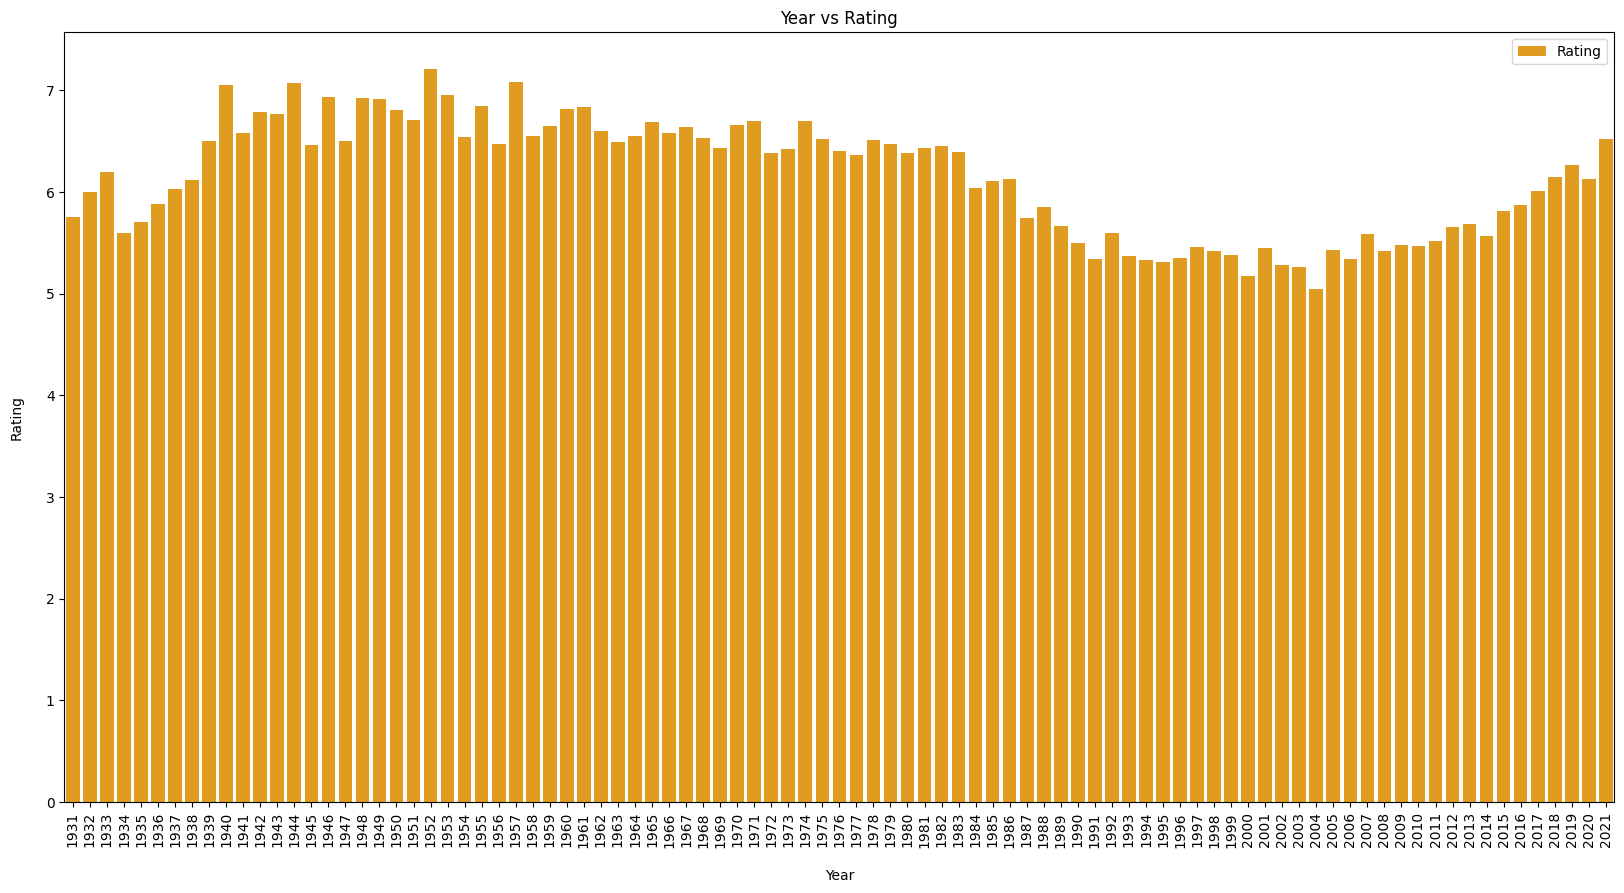

In [ ]:
# Visualization of Year vs. Average Rating
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Year', y='Rating',color='orange' ,errorbar=None, label='Rating')
plt.title('Year vs Rating')
plt.xlabel('\nYear')
plt.ylabel('Rating\n')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Correlation between Duration and Rating
selected_columns = ['Duration', 'Rating']
subset_data = df[selected_columns]
correlation_duration_rating = subset_data.corr()

In [ ]:
correlation_duration_rating

,Duration,Rating
Duration,1.000000,0.001839
Rating,0.001839,1.000000


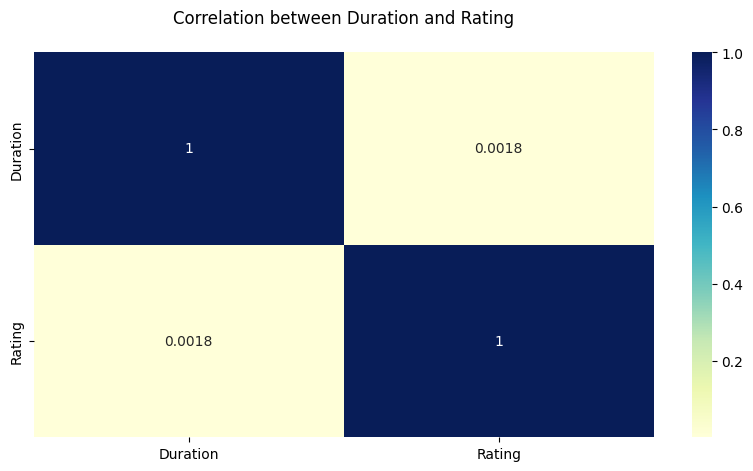

In [ ]:
# Visualization of correlation_duration_rating using heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_duration_rating, annot=True, cmap='YlGnBu')
plt.title('Correlation between Duration and Rating\n')
plt.show()

In [ ]:
# Top 10 Directors by Movie count
Director_movie_counts=df['Director'].value_counts().head(10)
Director_movie_counts

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Name: Director, dtype: int64

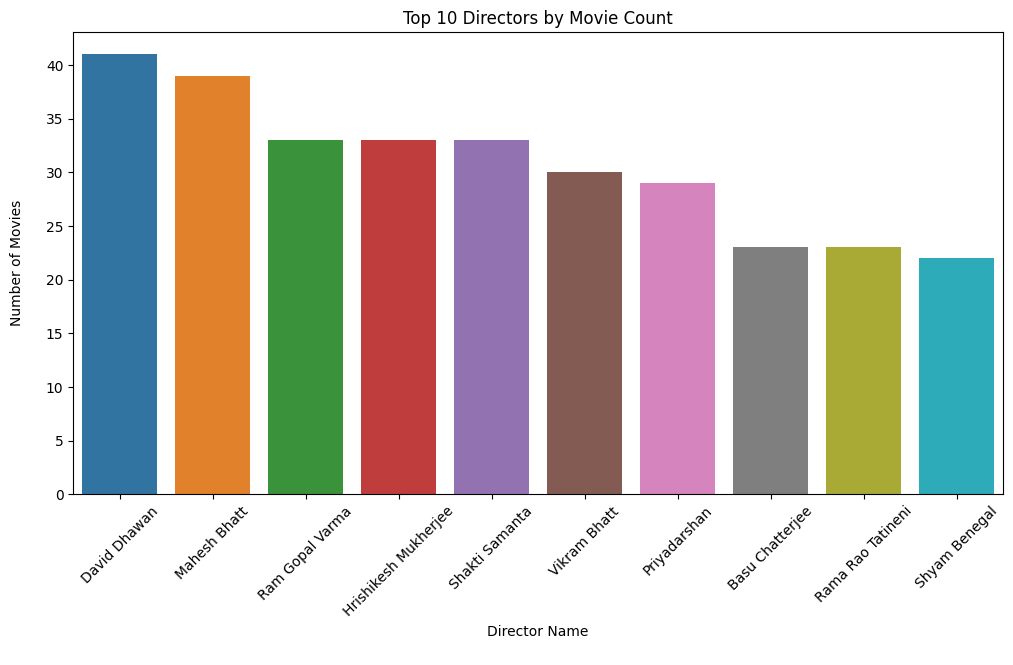

In [ ]:
# Visualize the Top 10 Directors by Movie Count
plt.figure(figsize=(12, 6))
sns.barplot(x=Director_movie_counts.index, y=Director_movie_counts.values)
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Director Name\n')
plt.ylabel('Number of Movies\n')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Combining 'Actor 1', 'Actor 2', and 'Actor 3' columns into a single Series
actors_series = df[['Actor 1', 'Actor 2', 'Actor 3']].stack()
print(actors_series)

1      Actor 1      Rasika Dugal
       Actor 2    Vivek Ghamande
       Actor 3     Arvind Jangid
3      Actor 1           Prateik
       Actor 2        Ishita Raj
                       ...      
15505  Actor 2    Twinkle Khanna
       Actor 3       Aruna Irani
15508  Actor 1        Dharmendra
       Actor 2        Jaya Prada
       Actor 3       Arjun Sarja
Length: 16977, dtype: object


In [ ]:
actors_movie_counts = actors_series.value_counts()
actors_movie_counts.head()

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

In [ ]:
# Display the top 10 actors by movie count
top_10_actors = actors_movie_counts.head(10)
print("Top 10 Actors by Movie Count:")
print(top_10_actors)

Top 10 Actors by Movie Count:
Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Ajay Devgn             92
Rekha                  92
dtype: int64


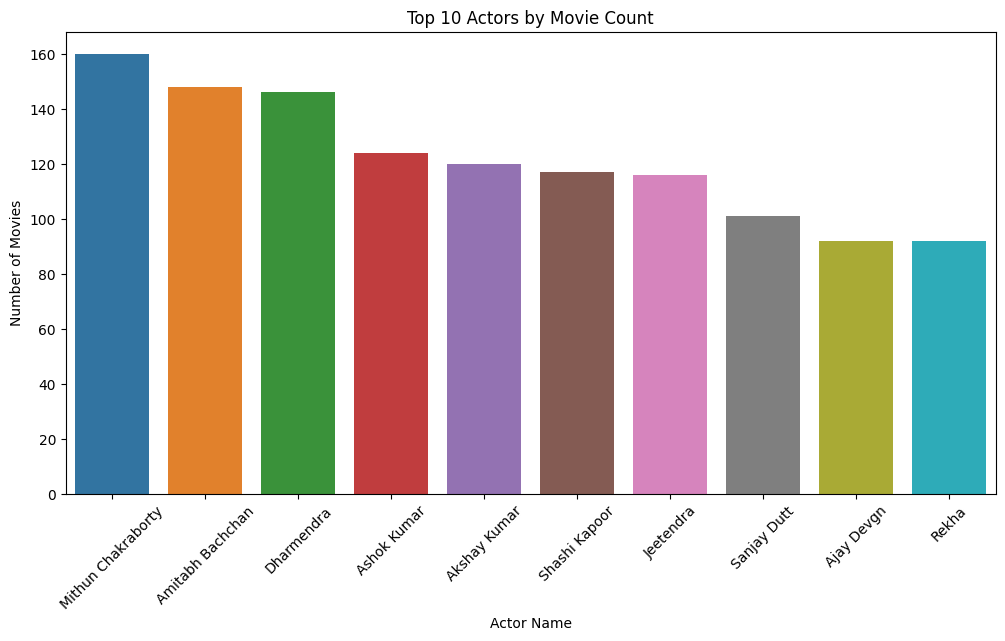

In [ ]:
# Visualize the top 10 actors by movie count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_actors.index, y=top_10_actors.values)
plt.title('Top 10 Actors by Movie Count')
plt.xlabel('Actor Name')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Split the genre strings into separate genre labels and counting them
Genre_counts = df['Genre'].str.split(',').explode().value_counts()
Genre_counts

 Drama         1954
Drama          1842
Action         1652
 Romance       1221
Comedy          989
 Crime          604
 Thriller       590
 Family         364
 Comedy         355
 Musical        322
Crime           271
 Mystery        245
 Adventure      172
Romance         159
Horror          128
 Fantasy        115
Adventure       105
 History         91
Musical          90
Thriller         89
Biography        84
 Horror          74
Mystery          59
Family           52
 Music           50
Documentary      48
Animation        40
 Sport           38
 Action          34
 Biography       31
Fantasy          31
 War             30
 Sci-Fi          28
History           8
Sci-Fi            4
War               3
Music             3
Sport             2
 News             1
 Western          1
Name: Genre, dtype: int64

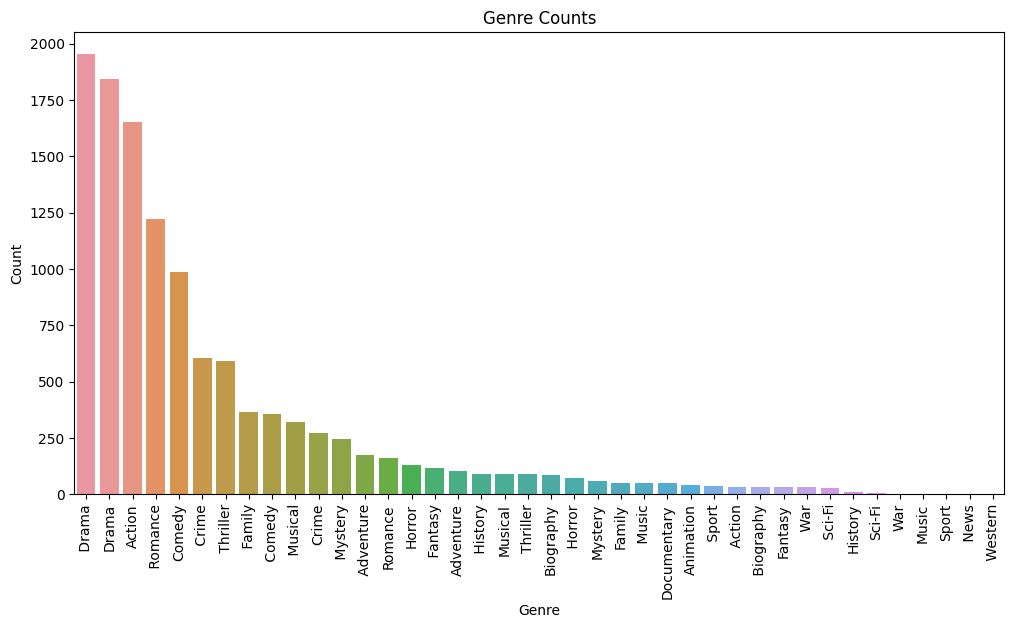

In [ ]:
# Create a bar plot to visualize genre counts
plt.figure(figsize=(12, 6))
sns.barplot(x=Genre_counts.index, y=Genre_counts.values)
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## **Feature Engineering**

In [ ]:
# Calculate Weighted Rating
df['Weighted_Rating'] = (df['Rating'] * df['Votes']) / df['Votes'].sum()
df.Weighted_Rating.head()

1    0.000004
3    0.000010
5    0.000255
6    0.000526
8    0.000120
Name: Weighted_Rating, dtype: float64

In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Weighted_Rating'],
      dtype='object')

In [ ]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Weighted_Rating
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0.000004
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0.000010


In [ ]:
# Find the Top 10 Movies by Weighted Rating
top_rated_movies = df.sort_values(by='Weighted_Rating', ascending=False).head(10)
top_rated_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Weighted_Rating
8219,Life of Pi,2012,127,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain,0.306052
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh,0.196926
8233,Lion,2016,118,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara,0.115565
4848,Gandhi,1982,191,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi,0.115351
8228,Like Stars on Earth,2007,165,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,0.096738
3410,Dangal,2016,161,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,0.090831
10882,PK,2014,153,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt,0.089219
14038,The Darjeeling Limited,2007,91,"Adventure, Comedy, Drama",7.2,185127,Wes Anderson,Owen Wilson,Adrien Brody,Jason Schwartzman,0.087313
11725,Rang De Basanti,2006,167,"Comedy, Crime, Drama",8.1,114446,Rakeysh Omprakash Mehra,Aamir Khan,Soha Ali Khan,Siddharth,0.060724
8035,Lagaan: Once Upon a Time in India,2001,224,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh,0.056897


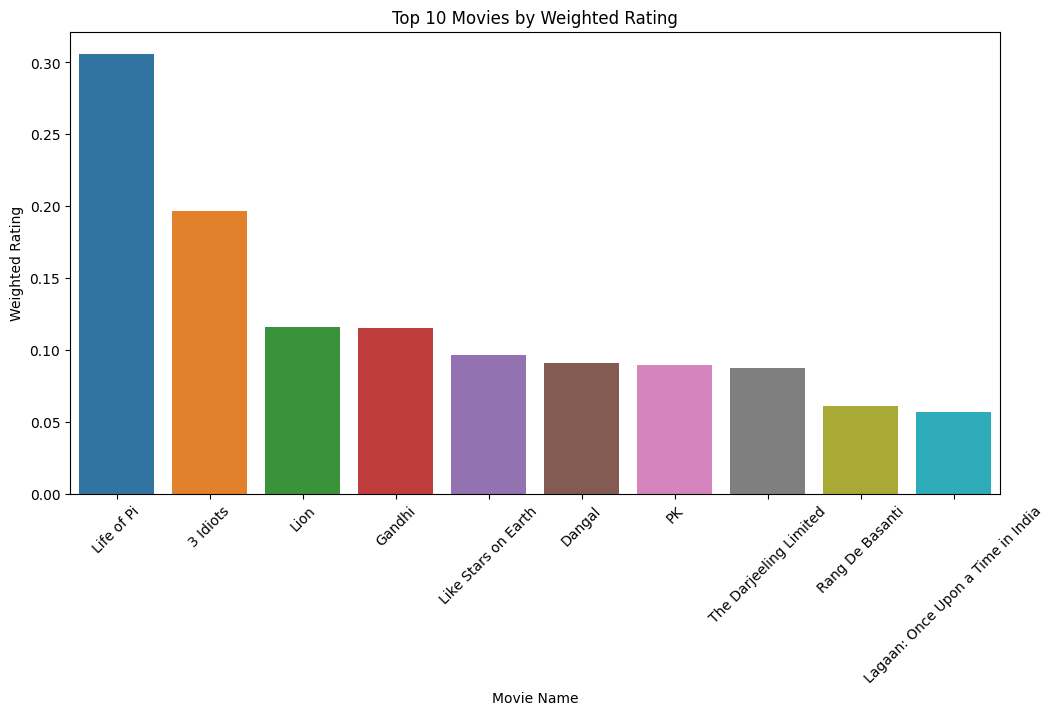

In [ ]:
#Visualize the Top 10 Movies by Weighted Rating
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Weighted_Rating', data=top_rated_movies)
plt.title('Top 10 Movies by Weighted Rating')
plt.xlabel('Movie Name')
plt.ylabel('Weighted Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Drop irrelevant features
df.drop(columns=['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)

In [ ]:
df.head(2)

,Year,Duration,Rating,Votes,Weighted_Rating
1,2019,109,7.0,8,0.000004
3,2019,110,4.4,35,0.000010


### **Model Selection and Evaluation**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Split Features and Target
X = df[['Year', 'Duration','Votes','Weighted_Rating']]
Y = df['Rating']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)

(4527, 4) (1132, 4)


In [ ]:
#Creating the Model
Model=RandomForestRegressor()

In [ ]:
#Training the Model
Model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
Y_pred_test = Model.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred_test)
R_Square = r2_score(Y_test, Y_pred_test)

print('MSE= ', MSE)
print('R-Square= ', R_Square)

MSE=  0.17566
R-Square=  0.9051380571133569


## **Building a Predictive System**

In [ ]:
df.tail(2)

,Year,Duration,Rating,Votes,Weighted_Rating
15505,1999,129,4.5,655,0.000193
15508,1998,130,6.2,20,0.000008


In [ ]:
# User-Input
Year = int(input("Enter the Release year of the Movie: "))
Duration = int(input("Enter the Duration of the movie (in minutes): "))
Votes = int(input("Enter the Number of votes given for the movie: "))
Weighted_Rating = float(input("Enter the Weighted rating of the movie: "))


User_Input={'Year': Year, 'Duration': Duration, 'Votes': Votes, 'Weighted_Rating' : Weighted_Rating}

#Converting User_Input into a Dataframe
Movie_Rating=pd.DataFrame([User_Input])


#Predicting the Movie Rating
Movie_Rating_Prediction=Model.predict(Movie_Rating)
print('\nThe Prediction of Movie Rating based on Given input =', Movie_Rating_Prediction[0])

Enter the Release year of the Movie: 1999
Enter the Duration of the movie (in minutes): 129
Enter the Number of votes given for the movie: 4
Enter the Weighted rating of the movie: 0.000193

The Prediction of Movie Rating based on Given input = 8.052000000000003


## **Project Summary**

### This project involved the creation of a movie rating prediction system using machine learning techniques. It began with the collection and preprocessing of movie data, followed by exploratory data analysis and feature engineering. The predictive model, trained on selected features such as year, duration, votes, and weighted rating, yielded promising results. A user-friendly predictive system was also developed, allowing users to input movie details and receive predicted ratings. This project demonstrates the capability of data analysis and machine learning for accurate movie rating estimation.